shape: (582, 600, 3) dtype: float64 min--max: 0.000--1.000
shape: (1311, 1287, 3) dtype: float64 min--max: 0.220--1.000
shape: (582, 600, 3) dtype: float64 min--max: 0.000--1.000
shape: (582, 571, 3) dtype: float64 min--max: 0.271--0.998


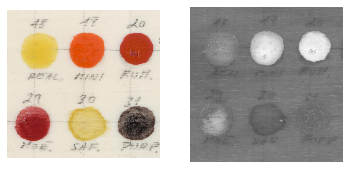

In [1]:
from falsevisir import *
from pprint import pprint

    
CFG['preprocess_images']['blur_sigma'] = 1

CFG['preprocess_images']['normalize'] = 0
CFG['preprocess_images']['equalize'] = 0

CFG['preprocess_images']['edge'] = 0
CFG['preprocess_images']['edge_sigma'] = 1
CFG['preprocess_images']['low_threshold'] = .02
CFG['preprocess_images']['high_threshold'] = .15

CFG['downsize'] = 400

CFG['extract_features']['min_distance'] = 1
CFG['extract_features']['patch_size'] = CFG['downsize'] // 8

CFG['match']['max_distance'] = 100


#pprint(CFG)

im_paths = "/home/m/git/falsevisir/samples/vis_samples/a002_palette.jpg", "/home/m/git/falsevisir/samples/ir_samples/a002_s002__TL.jpg"

im_paths = [Path(fp) for fp in im_paths]
vi_path, ir_path = im_paths

#%% Load images
vi_image, ir_image = [load_image(fp) for fp in im_paths]

print(info(vi_image))
print(info(ir_image))
#show_images((vi_image, ir_image))

#%% Resize to same height
vi_image, ir_image = resize_images((vi_image, ir_image))

print(info(vi_image))
print(info(ir_image))
show_images((vi_image, ir_image))

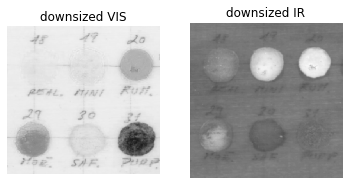

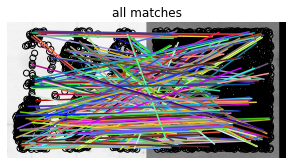

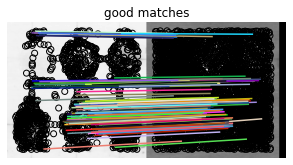

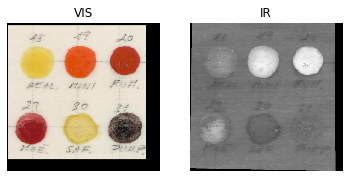

In [2]:
#%% Warp images
vi_image_w, ir_image_w = warp_images(vi_image, ir_image, show=True)



shape: (647, 664, 3) dtype: float64 min--max: 0.000--0.934
shape: (647, 664, 3) dtype: float64 min--max: 0.000--0.998


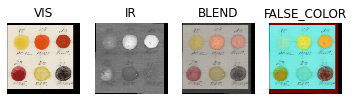

In [3]:
#%% Blend images
blend_im = blend_image(vi_image_w, ir_image_w, weight=.5)
print(info(blend_im))

#%% False color image
false_im = false_image(vi_image_w, ir_image_w)
print(info(false_im))

#%% Show results
show_images((vi_image_w, ir_image_w, blend_im, false_im), labels=("VIS", "IR", "BLEND", "FALSE_COLOR"))

In [4]:
#%% Save results

dst_dir = vi_path.parent / f"false_color_images"
dst_dir.mkdir(exist_ok=True)

# Warped images
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_vi_warp.png", vi_image_w)
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_ir_warp.png", ir_image_w)

# Blended images
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_blend.png", blend_im)
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_falsecolor.png", false_im)



In [ ]:
for ch in range(3):
    save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_vi_warp_{ch}.png", vi_image_w[:,:,ch])